In [41]:
from keras.datasets import mnist

In [42]:
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt

In [43]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

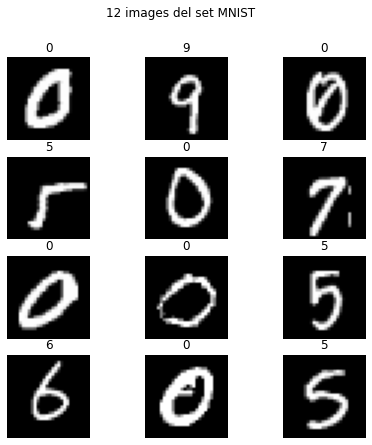

In [44]:
imagenes = np.random.randint(0,x_train.shape[0],12)
plt.figure(figsize=(7,7))
for i in range(len(imagenes)):
    img = x_train [imagenes[i],:,:]
    plt.subplot(4,3,i+1)
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    plt.title(y_train[imagenes[i]])
plt.suptitle('12 images del set MNIST')
plt.show()

In [45]:
X_train = np.reshape(x_train,(x_train.shape[0]*x_train.shape[1]*x_train.shape[2]))
X_test=np.reshape(x_test,(x_test.shape[0]*x_test.shape[1]*x_test.shape[2]))

In [46]:
#Normalizar los datos:
X_train = x_train/255.0
X_test = x_test/255.0

In [47]:
from keras.utils import np_utils

nclasses = 10
Y_train = np_utils.to_categorical(y_train,nclasses)
Y_test = np_utils.to_categorical(y_test,nclasses)

In [48]:
print(X_train.shape)

(60000, 28, 28)


TRAINING

In [50]:
#Optional: Establish a seed to obtain always the same performance of the network
np.random.seed(1)
input_dim = X_train.shape[1] #Input layer size (each img 784)
output_dim = Y_train.shape[1] #Output layer size (amount of possible tags 10)

In [51]:
modelo = Sequential()
modelo.add(Dense(20,input_dim,activation='relu')) #20 neurons on hidden layer
modelo.add(Dense(output_dim,activation='sigmoid'))

TypeError: __init__() got multiple values for argument 'activation'

In [ ]:
modelo.summary()

In [ ]:
import tensorflow as tf
from tensorflow import keras
#Compilar el modelo
modelo.compile(tf.keras.optimizers.SGD(0.2),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
modeloEntrenado = modelo.fit(X_train,Y_train,epochs=60,batch_size=1024,verbose=2)

In [ ]:
puntaje = modelo.evaluate(X_test,Y_test,verbose=0)
print('Precisión en el set de validación: {:.1f}%'.format(100*puntaje[1]))

In [ ]:
Y_pred = modelo.predict(X_test)
classes_y=np.argmax(Y_pred,axis=1)

plt.figure(figsize=(10,5))
imagenes = np.random.randint(0,X_test.shape[0],9)
for i in range(len(imagenes)):
	idx = imagenes[i]
	img = X_test[idx,:].reshape(28,28)
	cat_original = np.argmax(Y_test[idx,:])
	cat_prediccion = classes_y[idx]

	plt.subplot(3,3,i+1)
	plt.imshow(img, cmap='gray')
	plt.axis('off')
	plt.title('"{}" clasificado como "{}"'.format(cat_original,cat_prediccion))
plt.suptitle('Ejemplos de clasificación en el set de validación')
plt.show()